EDA

Признаки
1. Район - район, в котором находится находится квартира
2. Улица - улица, на которой находится дом
3. Станция метро - ближайшая к дому станция метро
4. Время до метро, мин. - время до ближайшей станции метро
5. Количество комнат - количество комнат в квартире
6. Общая площадь, м.кв. - общая площадь квартиры
7. Жилая площадь, м.кв. - площадь жилых комнат квартиры
8. Цена - цена квартиры
9. Год постройки - год постройки дома
10. Тип дома - тип постройки дома
11. Этаж - этаж, на котором находится квартира
12. Количество этажей в доме - общее количество этажей в доме, в котором находится квартира
13. Площадь кухни, м.кв. - площадь помещения кухни
14. Количество санузлов - количество санузлов в кваптире
15. Тип ремонта - тип ремонта в квартире
16. Количество подъездов в доме - количество подъездов в доме
Цена - целевая переменная

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Откроем файл с данными после парсинга

In [2]:
data = pd.read_csv('cian.csv')
print(data.shape)
data.head()


(1052, 16)


,Район,Улица,Станция метро,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Год постройки,Тип дома,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Тип ремонта,Количество подъездов в доме
0,Хамовники,ул. Ефремова,Фрунзенская,6,2,78.00,-,102999000.0,-,Монолитно-кирпичный,7,12,10.2,2,Евроремонт,-
1,Пресненский,2-я Звенигородская ул.,Улица 1905 года,7,3,116.80,-,120000000.0,2023,-,5,21,-,2,Евроремонт,1
2,Пресненский,2-я Звенигородская ул.,Улица 1905 года,7,3,116.78,-,120000000.0,2023,-,5,21,-,2,Евроремонт,1
3,Пресненский,ул. Костикова,Улица 1905 года,9,2,51.00,-,52000000.0,2023,-,3,21,-,1,Евроремонт,-
4,Головинский,ул. Лавочкина,Водный стадион,4,2,44.00,27.0,10000000.0,1968,Панельный,8,9,7.0,1,Без ремонта,8


Поменяем в некоторых столбцах тип данных на int, удалим дубликат, заменим пустые значения на 0, а '-' на пустые значения(где необходимо)

In [3]:
df = data[data['Цена'].notna()]
df = df.drop(2)
print(df.shape)
df = df.replace('-', np.nan)
df['Время до метро, мин.'] = df['Время до метро, мин.'].replace('откроется в 2024', 0).astype(int)
df['Жилая площадь, м.кв.'] = pd.to_numeric(df['Жилая площадь, м.кв.'], errors='coerce').fillna(0).round().astype(int)
df['Площадь кухни, м.кв.'] = pd.to_numeric(df['Площадь кухни, м.кв.'], errors='coerce').fillna(0).round().astype(int)
df['Количество санузлов'] = pd.to_numeric(df['Количество санузлов'], errors='coerce').fillna(0).round().astype(int)
df['Количество подъездов в доме'] = pd.to_numeric(df['Количество подъездов в доме'], errors='coerce').fillna(0).round().astype(int)
df.to_csv(r'cian1.csv', index = False)
df.head()

(1049, 16)


,Район,Улица,Станция метро,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Год постройки,Тип дома,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Тип ремонта,Количество подъездов в доме
0,Хамовники,ул. Ефремова,Фрунзенская,6,2,78.0,0,102999000.0,NaN,Монолитно-кирпичный,7,12,10,2,Евроремонт,0
1,Пресненский,2-я Звенигородская ул.,Улица 1905 года,7,3,116.8,0,120000000.0,2023,NaN,5,21,0,2,Евроремонт,1
3,Пресненский,ул. Костикова,Улица 1905 года,9,2,51.0,0,52000000.0,2023,NaN,3,21,0,1,Евроремонт,0
4,Головинский,ул. Лавочкина,Водный стадион,4,2,44.0,27,10000000.0,1968,Панельный,8,9,7,1,Без ремонта,8
5,Мещанский,Рождественский бул.,Трубная,4,3,140.0,100,227576030.0,1903,Кирпичный,2,4,26,2,NaN,4


Используем метод describe, чтобы узнать мат ожидание, стандартное отклонение и т.д.

In [4]:
df.describe()


,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Количество подъездов в доме
count,1049.000000,1049.000000,1049.000000,1049.000000,1.049000e+03,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,9.294566,2.224023,76.629905,27.676835,6.078524e+07,8.427073,16.761678,10.584366,1.343184,3.677788
std,4.476186,0.781681,40.281175,26.635572,7.317024e+07,7.483740,11.579069,8.742651,0.708760,3.602254
min,0.000000,1.000000,26.800000,0.000000,5.600000e+06,1.000000,3.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,44.000000,0.000000,1.380000e+07,3.000000,9.000000,6.000000,1.000000,1.000000
50%,9.000000,2.000000,65.000000,24.000000,3.070000e+07,6.000000,14.000000,10.000000,1.000000,3.000000
75%,12.000000,3.000000,99.900000,43.000000,7.700000e+07,10.000000,21.000000,15.000000,2.000000,5.000000
max,27.000000,3.000000,250.000000,177.000000,5.630642e+08,49.000000,78.000000,95.000000,3.000000,26.000000


Создадим новый дата фрейм, в котором оставим столбцы с данными, которые будем использовать для вычисления корреляции

In [5]:
df1 = df.drop(columns=["Район", "Улица", "Станция метро", "Тип дома", "Тип ремонта" ], axis=1)
df1.head()

,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Год постройки,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Количество подъездов в доме
0,6,2,78.0,0,102999000.0,NaN,7,12,10,2,0
1,7,3,116.8,0,120000000.0,2023,5,21,0,2,1
3,9,2,51.0,0,52000000.0,2023,3,21,0,1,0
4,4,2,44.0,27,10000000.0,1968,8,9,7,1,8
5,4,3,140.0,100,227576030.0,1903,2,4,26,2,4


In [6]:

df1.corr()

,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Год постройки,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Количество подъездов в доме
"Время до метро, мин.",1.000000,-0.082419,-0.160543,0.026946,-0.192560,0.101160,0.062012,0.113271,-0.006866,-0.143479,0.035895
Количество комнат,-0.082419,1.000000,0.701716,0.325068,0.489609,-0.008889,-0.020122,0.023615,0.146143,0.498351,0.035825
"Общая площадь, м.кв.",-0.160543,0.701716,1.000000,0.280458,0.829797,0.134978,-0.041583,0.023945,0.308286,0.674481,-0.009731
"Жилая площадь, м.кв.",0.026946,0.325068,0.280458,1.000000,0.191962,-0.007861,-0.058617,-0.006982,0.337818,0.171920,0.030598
Цена,-0.192560,0.489609,0.829797,0.191962,1.000000,0.132217,-0.110624,-0.107778,0.265194,0.626065,-0.048312
Год постройки,0.101160,-0.008889,0.134978,-0.007861,0.132217,1.000000,0.328505,0.479826,0.232653,0.143159,-0.021600
Этаж,0.062012,-0.020122,-0.041583,-0.058617,-0.110624,0.328505,1.000000,0.651812,0.151954,-0.025140,-0.055098
Количество этажей в доме,0.113271,0.023615,0.023945,-0.006982,-0.107778,0.479826,0.651812,1.000000,0.130172,0.014743,-0.077770
"Площадь кухни, м.кв.",-0.006866,0.146143,0.308286,0.337818,0.265194,0.232653,0.151954,0.130172,1.000000,0.216146,-0.044887
Количество санузлов,-0.143479,0.498351,0.674481,0.171920,0.626065,0.143159,-0.025140,0.014743,0.216146,1.000000,-0.063537


Создадим матрицу корреляции

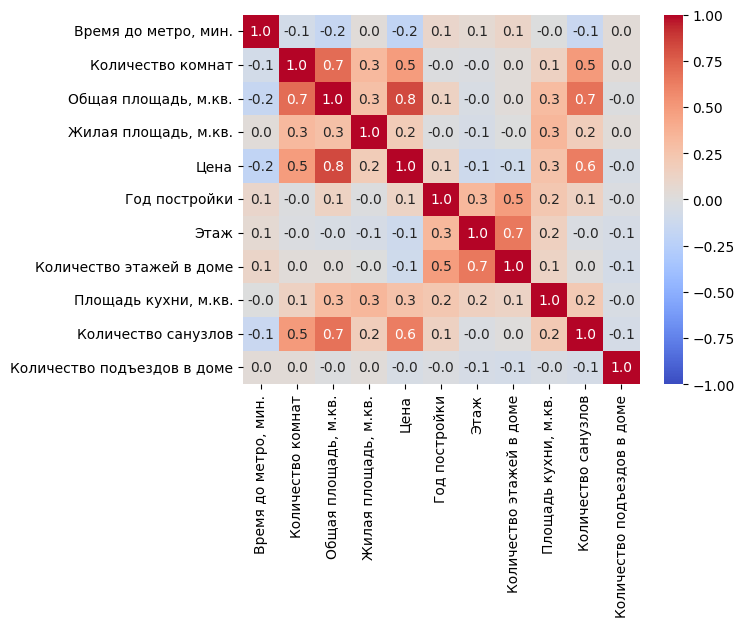

In [7]:
sns.heatmap(df1.corr(), annot=True, fmt = '0.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

Из матрицы корреляции становится видно, что существуют довольно сильные положительные зависимости между общей площадью и ценой, кол-вом комнат и общей площадью, количеством комнат и ценой, общей площадью и кол-вом санузлов, ценой и кол-вом санузлов, кол-вом комнат и кол-вом санузлов, этажом квартиры и количеством этажей в доме, количеством этажей в доме и годом постройки; несильные отрицательные зависимости между: временем до метро и ценой, временем до метро и общей площадью, ценой и этажом, кол-вом этажей в доме и ценой.

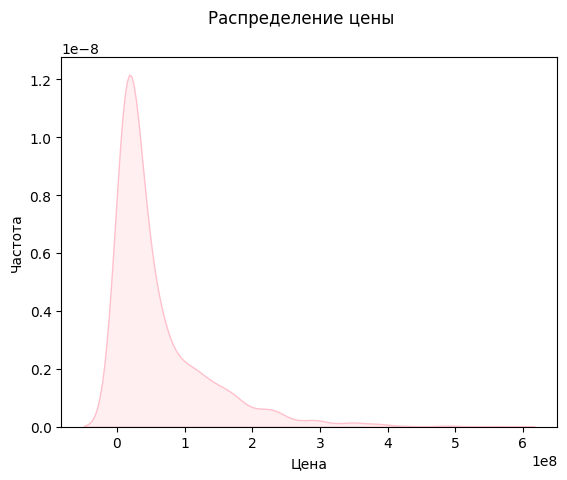

In [8]:
sns.kdeplot(df['Цена'], color = 'pink', fill = True)
plt.suptitle('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

Из графика видим, что распределение цены похоже на нормальное, но мода, мат ожидание и медиана смещены влево. Это может говорить о будущем росте цен на квартиры. 

Узнаем список уникальных районов в выборке

In [9]:
print(df['Район'].nunique())
df['Район'].unique()

114


array(['Хамовники', 'Пресненский', 'Головинский', 'Мещанский',
       'Хорошево-Мневники', 'Гольяново', 'Люблино', 'Арбат', 'Тверской',
       'Кузьминки', 'Ясенево', 'Черемушки', 'Некрасовка', 'поселение',
       'Печатники', 'Проспект', 'Южнопортовый', 'Замоскворечье',
       'Дорогомилово', 'Очаково-Матвеевское', 'Отрадное', 'Хорошевский',
       'Лосиноостровский', 'Новогиреево', 'Свиблово', 'Басманный',
       'Фили-Давыдково', 'Раменки', 'Южное', 'Даниловский', 'Якиманка',
       'Алтуфьевский', 'Митино', 'Таганский', 'Академический',
       'Сокольники', 'Нагатино-Садовники', 'Соколиная', 'Нагорный',
       'Матушкино', 'Чертаново', 'Дмитровский', 'Коптево', 'Аэропорт',
       'Марьина', 'Усадебный', 'Зябликово', 'Северное', 'Марьино',
       'Перово', 'Восточное', 'Донской', 'Красносельский', 'Нагатинский',
       'Царицыно', 'Бутырский', 'Кунцево', 'Сокол', 'Ярославский',
       'Крылатское', 'Нижегородский', 'Филевский', 'Бибирево',
       'Преображенское', 'Рязанский', 'Брат

В массиве районов попадаются такие элементы, как "поселок", "дп", "поселение", "рп". Вероятно, квартиры находятся в поселениях, входящих в состав города.

Построим график распределения по районам

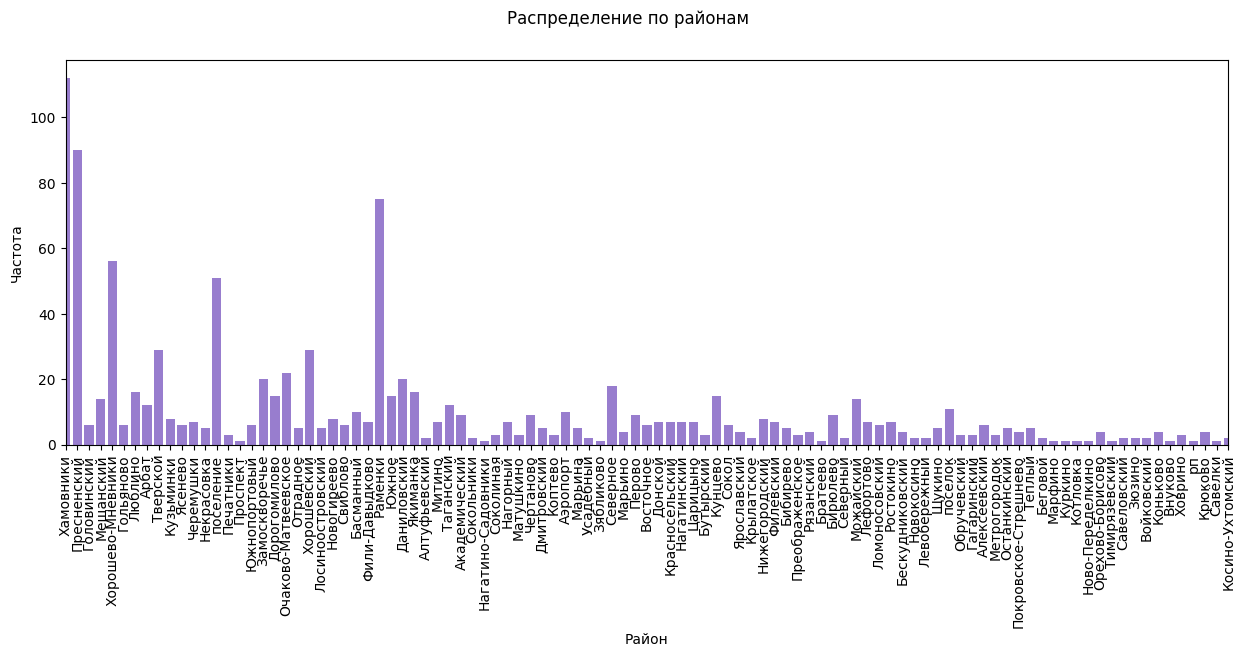

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Район', data=df, color = 'mediumpurple')
plt.suptitle('Распределение по районам')
plt.xlabel('Район')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.xlim(0, 100)
plt.show()

Из графика видно, что больше всего квартир продается в районах Хамовники, Пресненский, Раменки, Хорошово-мневники, Тверской, Хорошевский, а также в различных поселениях

Построим график распределения количества комнат 

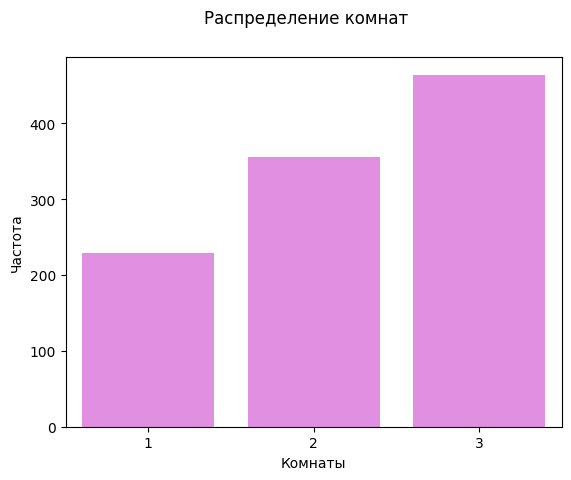

In [11]:
sns.countplot(x='Количество комнат', data=df, color = 'violet')
plt.suptitle('Распределение комнат')
plt.xlabel('Комнаты')
plt.ylabel('Частота')

plt.show()

В выборке больше всего 3-комнатных квартир

Создадим таблицу, в которой индексами будут названия районов, а в колонке кол-во квартир, которые продаются в этих районах

In [12]:
distr_table = df.pivot_table(df, index = 'Район', aggfunc = len)
distr_table = distr_table.drop(distr_table.columns.difference(['Улица']), axis=1)

distr_table

,Улица
Район,
Академический,9
Алексеевский,6
Алтуфьевский,2
Арбат,12
Аэропорт,10
...,...
Ясенево,6
дп,2
поселение,51


Проверим, верен ли график распределения по районам

In [13]:
max_distr = distr_table['Улица'].nlargest(10).index
max_distr

Index(['Хамовники', 'Пресненский', 'Раменки', 'Хорошево-Мневники', 'поселение',
       'Тверской', 'Хорошевский', 'Очаково-Матвеевское', 'Даниловский',
       'Замоскворечье'],
      dtype='object', name='Район')

Данные из таблицы совпадают с данными графика

Построим точечный график зависимости цены квартиры от района, в котором она находится

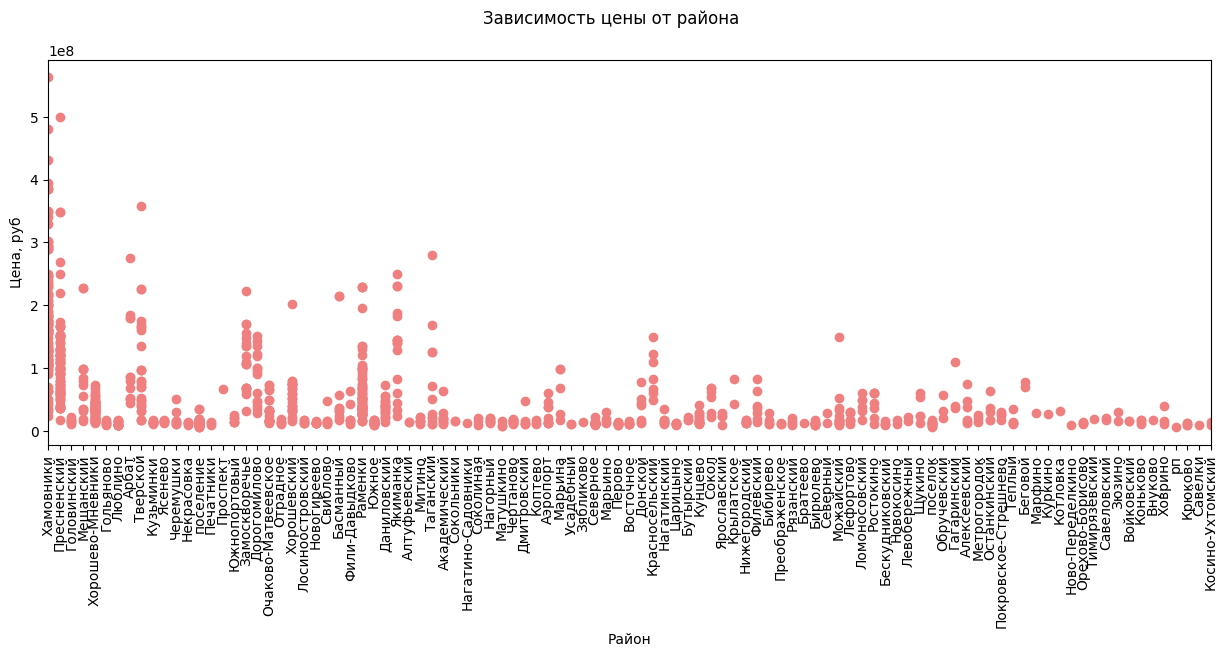

In [14]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Район'], df['Цена'], color='lightcoral')
plt.xticks(rotation=90)
plt.xlim(0, 100)
plt.suptitle('Зависимость цены от района')
plt.xlabel('Район')
plt.ylabel('Цена, руб')
plt.show()


Самые дорогие квартиры в районах Хамовники, Пресненский, Арбат, Замоскворечье, Тверской, Якиманка, Раменки, Таганский

Построим график зависимости площади квартиры от района, в котором она находится

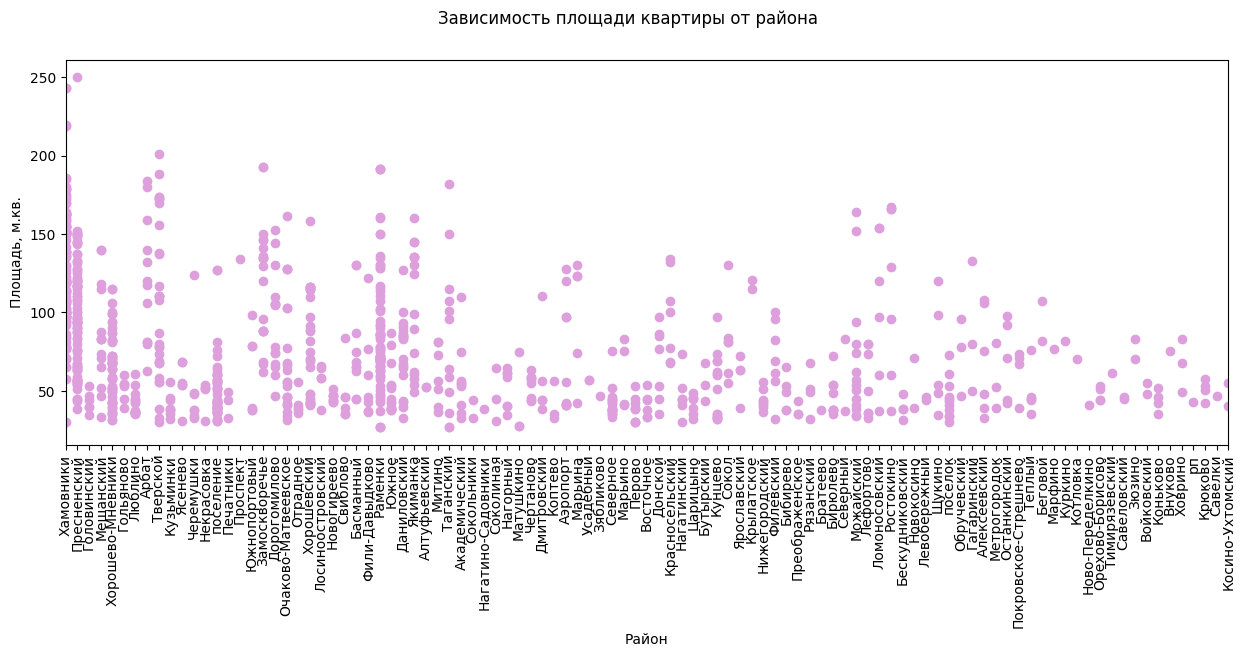

In [15]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Район'], df['Общая площадь, м.кв.'], color='plum')
plt.xlim(0, 100)
plt.xticks(rotation=90)
plt.suptitle('Зависимость площади квартиры от района')
plt.xlabel('Район')
plt.ylabel('Площадь, м.кв.')
plt.show()


Самые большие квартиры находятся ближе к центру города в районах Хамовники, Пресненский, Арбат, Тверской, Раменки, а самые маленькие в районах Черемушки, Печатники, Лосиноостровский, Новогиреево, Сокольники, Преображенское, Свиблово

На основе визуализаций нами были выдвинуты следующие гипотезы: 
1. Самые дорогие квартиры находятся ближе к центру Москвы
2. Самые большие по площади квартиры находятся ближе к центру Москвы, а самые маленькие - ближе к окраинам
3. Чаще всего продают 3-комнатные квартиры
4. Чаще всего продают квартиры, которые находятся ближе к центру
5. Количество подъездов в доме не влияет ни на что

(будет дополняться)